In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [24]:
df = pd.read_csv("/content/gdrive/MyDrive/data.csv")
df.head()

,Unnamed: 0,Optimum Time quantum,Avg Arrival Time,Avg Burst Time,Total Completion Time,Number of processes
0,0,2,10.777778,13.000000,117,9
1,1,3,10.500000,12.500000,75,6
2,2,7,8.000000,16.200000,81,5
3,3,3,11.500000,7.500000,30,4
4,4,9,10.000000,15.333333,46,3


In [25]:
y = df["Optimum Time quantum"]
df = df.drop(["Unnamed: 0", "Optimum Time quantum"], axis = "columns")

In [26]:
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
n_classes = len(list(np.unique(y)))

In [28]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = df
X_scaled = std.fit_transform(X)

#PCA

In [36]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components = 0.99, random_state = 17)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [45]:
X_pca.shape

(10000, 3)

In [46]:
X.shape

(10000, 4)

#K means

On X

In [29]:
from sklearn.cluster import KMeans

In [30]:
k = KMeans(n_clusters = n_classes, n_init = 100, random_state = 17)

In [31]:
k.fit(X)

KMeans(n_clusters=9, n_init=100, random_state=17)

In [19]:
cluster_labels = k.labels_
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

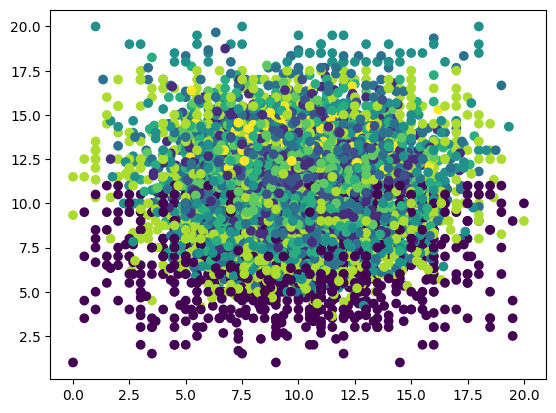

In [33]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = cluster_labels, cmap='viridis');

In [34]:
pd.crosstab(cluster_labels, y, margins=True)

Optimum Time quantum,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,
0,716,55,42,42,37,24,20,10,15,961
1,253,97,69,58,97,161,119,177,218,1249
2,161,35,36,35,48,101,98,122,224,860
3,317,105,98,95,147,151,120,166,173,1372
4,303,103,87,103,119,150,146,121,117,1249
5,273,87,106,75,120,147,154,187,203,1352
6,232,59,64,47,76,164,122,201,267,1232
7,543,113,121,102,131,111,86,72,76,1355
8,75,10,19,6,29,36,40,43,112,370


In [35]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, cluster_labels)

0.028915700377037994

In [40]:
inertia = []
for i in range(1,11):
  k=KMeans(n_clusters=i,n_init=100,random_state=17)
  k.fit(X_scaled)
  k.transform(X_scaled)
  inertia.append(np.sqrt(k.inertia_))

[]

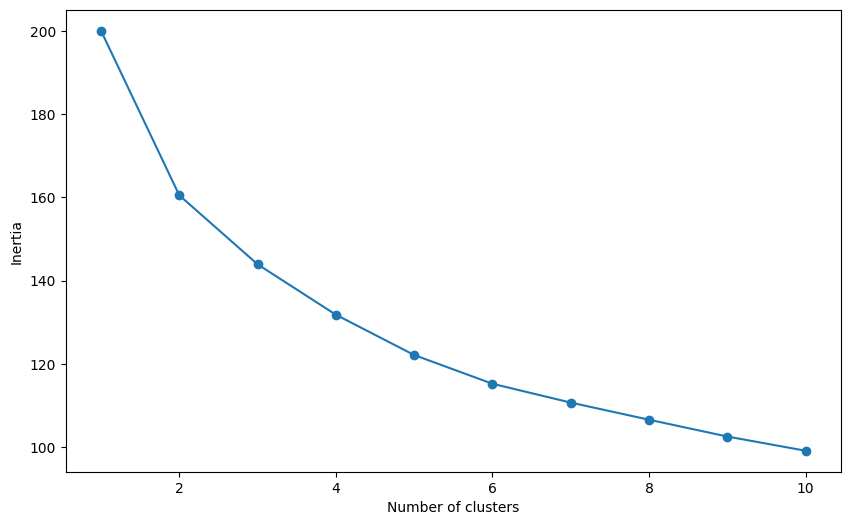

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.plot()

In [42]:
k=KMeans(n_clusters=2, n_init=100, random_state=17)
k.fit(X_scaled)
k.transform(X_scaled)
cluster_labels=k.labels_
adjusted_rand_score(y,cluster_labels)

0.027037256042183988

On X_pca

In [47]:
k = KMeans(n_clusters=n_classes,n_init=100,random_state=17)
k.fit(X_pca)

KMeans(n_clusters=9, n_init=100, random_state=17)

In [48]:
cluster_labels = k.labels_
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

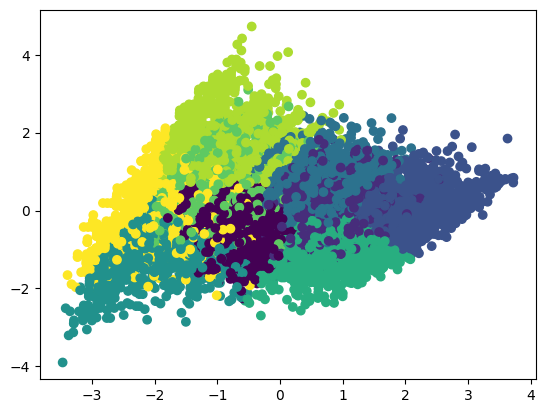

In [49]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis');

In [50]:
pd.crosstab(cluster_labels, y, margins=True)

Optimum Time quantum,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,
0,323,119,120,107,144,157,140,146,137,1393
1,226,104,87,69,102,136,118,158,152,1152
2,281,53,67,47,95,168,159,199,394,1463
3,192,51,51,38,63,127,119,139,234,1014
4,383,72,57,56,55,48,44,38,48,801
5,294,79,84,64,111,179,133,211,234,1389
6,263,61,51,44,74,86,65,89,93,826
7,379,51,58,76,90,104,88,90,88,1024
8,532,74,67,62,70,40,39,29,25,938


In [51]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, cluster_labels)

0.016588610165789285

#C Means

In [54]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [57]:
X

,Avg Arrival Time,Avg Burst Time,Total Completion Time,Number of processes
0,10.777778,13.000000,117,9
1,10.500000,12.500000,75,6
2,8.000000,16.200000,81,5
3,11.500000,7.500000,30,4
4,10.000000,15.333333,46,3
...,...,...,...,...
9995,10.875000,13.000000,104,8
9996,12.666667,9.666667,58,6
9997,11.000000,9.000000,27,3
9998,9.800000,9.800000,49,5


In [58]:
from fcmeans import FCM
my_model = FCM(n_clusters = n_classes)
my_model.fit(X.to_numpy()) 

In [61]:
centers = my_model.centers
labels = my_model.predict(X.to_numpy())

In [62]:
centers

array([[  9.87721867,   6.74366908,  15.47966455,   2.38025921],
       [  9.98878892,  10.48177396,  52.1196551 ,   5.21410281],
       [  9.92592611,   9.98783589,  27.60569887,   2.96866707],
       [  9.97286674,  10.59834241,  78.5805639 ,   7.61420609],
       [ 10.08990205,  11.09742288,  92.38696652,   8.4717069 ],
       [ 10.11501704,  13.01924499, 124.7567784 ,   9.61489194],
       [  9.96986192,  10.46155461,  65.55714949,   6.51485939],
       [ 10.03811232,  10.33562292,  39.48900883,   4.06330278],
       [  9.8275879 ,  11.78032827, 106.57873861,   9.13667899]])

In [63]:
labels

array([5, 3, 3, ..., 2, 1, 0])

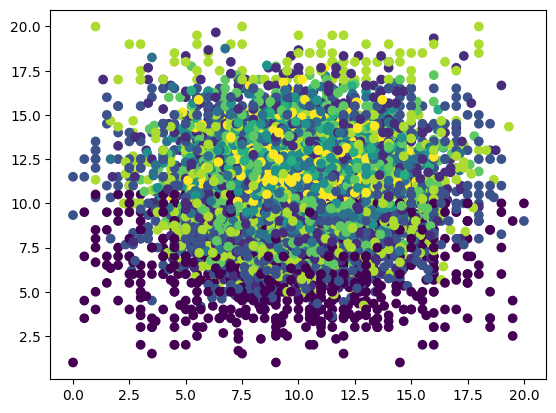

In [64]:
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')

In [65]:
pd.crosstab(labels, y, margins=True)

Optimum Time quantum,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,
0,630,41,29,26,25,15,16,9,10,801
1,324,112,107,110,151,158,130,170,170,1432
2,562,106,115,101,121,97,69,52,54,1277
3,256,96,70,61,100,172,131,183,224,1293
4,232,57,62,45,72,150,108,186,255,1167
5,91,13,20,12,39,50,50,59,153,487
6,301,92,107,79,125,150,155,187,201,1397
7,314,106,87,95,123,146,142,119,126,1258
8,163,41,45,34,48,107,104,134,212,888


In [66]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

0.024712151201299357